# EDA Football Analysis


## Step 0 — Imports and Data Loading

In this step we load all necessary libraries and read the dataset.  
No transformations yet — just bringing everything into the environment.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/combined_matches.csv")


FileNotFoundError: [Errno 2] No such file or directory: '../data/combined_matches.csv'

## Step 1 — Data Understanding

In this section we explore the raw structure of the dataset:

- Number of rows and columns  
- First and last rows  
- Column names and data types  
- Basic descriptive statistics  
- Initial impressions about data quality

In [75]:
# Number of rows and columns
df.shape

(216883, 7)

In [76]:
# The first five rows of the Dataframe
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,Serie A,29/08/93,Atalanta,Cagliari,5.0,2.0,H
1,Serie A,29/08/93,Genoa,Roma,2.0,0.0,H
2,Serie A,29/08/93,Inter,Reggiana,2.0,1.0,H
3,Serie A,29/08/93,Juventus,Cremonese,1.0,0.0,H
4,Serie A,29/08/93,Lazio,Foggia,0.0,0.0,D


In [77]:
# The last five rows of the Dataset
df.tail()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
216878,English League 2,08/05/2023,Stockport,Hartlepool,1.0,1.0,D
216879,English League 2,08/05/2023,Sutton,Carlisle,1.0,1.0,D
216880,English League 2,08/05/2023,Swindon,Crawley Town,2.0,1.0,H
216881,English League 2,08/05/2023,Tranmere,Northampton,0.0,1.0,A
216882,English League 2,08/05/2023,Walsall,Doncaster,2.0,1.0,H


In [78]:
# General info about columns, non-null counts and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216883 entries, 0 to 216882
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   League     216883 non-null  object 
 1   Date       216883 non-null  object 
 2   HomeTeam   216883 non-null  object 
 3   AwayTeam   216883 non-null  object 
 4   HomeGoals  216883 non-null  float64
 5   AwayGoals  216883 non-null  float64
 6   Result     216883 non-null  object 
dtypes: float64(2), object(5)
memory usage: 11.6+ MB


In [79]:
# Just the column names as a list
df.columns

Index(['League', 'Date', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals',
       'Result'],
      dtype='object')

In [80]:
# How many leagues, teams and result types
df["League"].nunique(), df["HomeTeam"].nunique(), df["Result"].value_counts()

(22,
 795,
 Result
 H    98116
 A    60539
 D    58228
 Name: count, dtype: int64)

In [81]:
# Leagues 
df["League"].unique()


array(['Serie A', 'Ligue 1', 'Eredivisie', 'La Liga',
       'English Championship', 'English Premier League', 'Bundesliga',
       'English League 2', 'Bundesliga 2', 'English League 1',
       'Scottish Division 1', 'Liga Portugal', 'Scottish Premier League',
       'Greek Super League', 'Super Lig', 'Jupiler League', 'Ligue 2',
       'La Liga 2', 'Scottish Division 2', 'Scottish Division 3',
       'Serie B', 'English Conference'], dtype=object)

In [82]:
# Desribbe Information
df.describe()

,HomeGoals,AwayGoals
count,216883.000000,216883.000000
mean,1.497619,1.127073
std,1.265852,1.106313
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,13.000000


In [83]:
df["HomeGoals"].value_counts()

HomeGoals
1.0     72043
2.0     52926
0.0     50425
3.0     26134
4.0     10320
5.0      3517
6.0      1108
7.0       311
8.0        76
9.0        17
10.0        6
Name: count, dtype: int64

In [84]:
# Number of missing values per column
df.isna().sum()

League       0
Date         0
HomeTeam     0
AwayTeam     0
HomeGoals    0
AwayGoals    0
Result       0
dtype: int64

## Step 2 — Data Cleaning & Feature Engineering

In this section we prepare the dataset for analysis.  
We focus on:

1. Converting the `Date` column to proper datetime format  
2. Extracting new time-based features  
3. Creating football‐specific variables (TotalGoals, GoalDifference, Result flags)  
4. Checking and removing duplicates  
5. Handling missing values  
6. Ensuring data consistency (no negative goals, valid results)  

In [85]:
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,Serie A,29/08/93,Atalanta,Cagliari,5.0,2.0,H
1,Serie A,29/08/93,Genoa,Roma,2.0,0.0,H
2,Serie A,29/08/93,Inter,Reggiana,2.0,1.0,H
3,Serie A,29/08/93,Juventus,Cremonese,1.0,0.0,H
4,Serie A,29/08/93,Lazio,Foggia,0.0,0.0,D


In [ ]:
# Change the date columns to have the full date
df["Date"] = pd.to_datetime(
    df["Date"].astype(str).str.strip(),
    dayfirst=True,
    errors="coerce"
)
df.head()

C:\Users\alber\AppData\Local\Temp\ipykernel_20776\4005885113.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(


,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D


In [91]:
# Check for Nan Values
Nan_values = df["Date"].isna().sum()
print("Amount of Nan Values: ",Nan_values)

Amount of Nan Values:  0


In [99]:
# Year Columns
df["Year"] = df["Date"].dt.year
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993


In [102]:
# Month Column
df["Month"] = df["Date"].dt.month
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8


In [103]:
df["Day of the week"] = df["Date"].dt.day_of_week
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6


In [107]:
df["Day of month"] = df["Date"].dt.day
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,Day of month
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,29
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,29
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,29
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,29
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,29


In [161]:
df["Day Name"] = df["Date"].dt.day_name()
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,HomeCleanSheet,AwayCleanSheet,BTTS,Over 2.5,Under 2.5,Scoreline,Season,HomeWin,AwayWin,Draw
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,...,0,0,1,1,0,5-2,1993,1,0,0
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,...,1,0,0,0,1,2-0,1993,1,0,0
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,...,0,0,1,0,1,2-1,1993,1,0,0
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,...,1,0,0,0,1,1-0,1993,1,0,0
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,...,1,1,0,0,1,0-0,1993,0,0,1


In [162]:
df["Month Name"] = df["Date"].dt.month_name()
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,AwayCleanSheet,BTTS,Over 2.5,Under 2.5,Scoreline,Season,HomeWin,AwayWin,Draw,Month Name
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,...,0,1,1,0,5-2,1993,1,0,0,August
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,...,0,0,0,1,2-0,1993,1,0,0,August
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,...,0,1,0,1,2-1,1993,1,0,0,August
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,...,0,0,0,1,1-0,1993,1,0,0,August
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,...,1,0,0,1,0-0,1993,0,0,1,August


In [ ]:
# Number of Total Goals in match
df["Total Goals"] = df["HomeGoals"] + df["AwayGoals"]
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,Day of month,Day Name,Total Goals
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,29,August,7.0
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,29,August,2.0
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,29,August,3.0
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,29,August,1.0
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,29,August,0.0


In [115]:
# Goal Difference
df["Goal Difference"] = df["HomeGoals"] - df["AwayGoals"]
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,Day of month,Day Name,Total Goals,Goal Difference
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,29,August,7.0,3.0
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,29,August,2.0,2.0
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,29,August,3.0,1.0
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,29,August,1.0,1.0
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,29,August,0.0,0.0


In [118]:
# Number of points in home

df["Home_Points"] = 0   

for idx, row in df.iterrows():
    if row["Result"] == "H":
        df.loc[idx, "Home_Points"] = 3
    elif row["Result"] == "D":
        df.loc[idx, "Home_Points"] = 1
    else:
        df.loc[idx, "Home_Points"] = 0

df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,Day of month,Day Name,Total Goals,Goal Difference,Home_Points
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,29,August,7.0,3.0,3
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,29,August,2.0,2.0,3
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,29,August,3.0,1.0,3
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,29,August,1.0,1.0,3
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,29,August,0.0,0.0,1


In [123]:
# Number of Points Away
df["Away Points"] = 0

for index,row in df.iterrows():
    if row["Result"] == "A":
        df.loc[index,"Away Points"] = 3
    elif row["Result"] == "D":
        df.loc[index,"Away Points"] = 1
    else:
        df.loc[index,"Away Points"] = 0

df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,Day of month,Day Name,Total Goals,Goal Difference,Home_Points,Away Points
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,29,August,7.0,3.0,3,0
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,29,August,2.0,2.0,3,0
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,29,August,3.0,1.0,3,0
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,29,August,1.0,1.0,3,0
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,29,August,0.0,0.0,1,1


In [125]:
# Winner 
df["Winner"] = df["Result"].map({"H": "Home", "A": "Away", "D": "Draw"})
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,Day of month,Day Name,Total Goals,Goal Difference,Home_Points,Away Points,Winner
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,29,August,7.0,3.0,3,0,Home
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,29,August,2.0,2.0,3,0,Home
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,29,August,3.0,1.0,3,0,Home
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,29,August,1.0,1.0,3,0,Home
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,29,August,0.0,0.0,1,1,Draw


In [127]:
# Loser 
df["Loser"] = df["Result"].map({"H": "Away", "A": "Home", "D": "None"})
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,Day of month,Day Name,Total Goals,Goal Difference,Home_Points,Away Points,Winner,Loser
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,29,August,7.0,3.0,3,0,Home,Away
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,29,August,2.0,2.0,3,0,Home,Away
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,29,August,3.0,1.0,3,0,Home,Away
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,29,August,1.0,1.0,3,0,Home,Away
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,29,August,0.0,0.0,1,1,Draw,None


In [129]:
#Home Clean Sheet
df["HomeCleanSheet"] = (df["AwayGoals"] == 0).astype(int)
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,Day of month,Day Name,Total Goals,Goal Difference,Home_Points,Away Points,Winner,Loser,HomeCleanSheet
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,29,August,7.0,3.0,3,0,Home,Away,0
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,29,August,2.0,2.0,3,0,Home,Away,1
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,29,August,3.0,1.0,3,0,Home,Away,0
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,29,August,1.0,1.0,3,0,Home,Away,1
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,29,August,0.0,0.0,1,1,Draw,None,1


In [132]:
# Away Cleen Sheet
df["AwayCleanSheet"] = (df["HomeGoals"] == 0).astype(int)
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,Day of month,Day Name,Total Goals,Goal Difference,Home_Points,Away Points,Winner,Loser,HomeCleanSheet,AwayCleanSheet
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,29,August,7.0,3.0,3,0,Home,Away,0,0
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,29,August,2.0,2.0,3,0,Home,Away,1,0
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,29,August,3.0,1.0,3,0,Home,Away,0,0
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,29,August,1.0,1.0,3,0,Home,Away,1,0
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,29,August,0.0,0.0,1,1,Draw,None,1,1


In [133]:
# Both Teams Scored 
df["BTTS"] = ((df["HomeGoals"] > 0) & (df["AwayGoals"] > 0)).astype(int)
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,Day Name,Total Goals,Goal Difference,Home_Points,Away Points,Winner,Loser,HomeCleanSheet,AwayCleanSheet,BTTS
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,...,August,7.0,3.0,3,0,Home,Away,0,0,1
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,...,August,2.0,2.0,3,0,Home,Away,1,0,0
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,...,August,3.0,1.0,3,0,Home,Away,0,0,1
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,...,August,1.0,1.0,3,0,Home,Away,1,0,0
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,...,August,0.0,0.0,1,1,Draw,None,1,1,0


In [135]:
# Over and Under 2.5 Goals
df["Over 2.5"] = (df["HomeGoals"] > 2.5).astype(int)
df["Under 2.5"] = (df["HomeGoals"] <= 2.5).astype(int)
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,Goal Difference,Home_Points,Away Points,Winner,Loser,HomeCleanSheet,AwayCleanSheet,BTTS,Over 2.5,Under 2.5
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,...,3.0,3,0,Home,Away,0,0,1,1,0
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,...,2.0,3,0,Home,Away,1,0,0,0,1
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,...,1.0,3,0,Home,Away,0,0,1,0,1
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,...,1.0,3,0,Home,Away,1,0,0,0,1
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,...,0.0,1,1,Draw,None,1,1,0,0,1


In [137]:
# ScoreLine 
df["Scoreline"] = (
    df["HomeGoals"].astype(int).astype(str) + 
    "-" + 
    df["AwayGoals"].astype(int).astype(str)
)
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,Home_Points,Away Points,Winner,Loser,HomeCleanSheet,AwayCleanSheet,BTTS,Over 2.5,Under 2.5,Scoreline
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,...,3,0,Home,Away,0,0,1,1,0,5-2
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,...,3,0,Home,Away,1,0,0,0,1,2-0
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,...,3,0,Home,Away,0,0,1,0,1,2-1
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,...,3,0,Home,Away,1,0,0,0,1,1-0
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,...,1,1,Draw,None,1,1,0,0,1,0-0


In [143]:
# Season
df["Season"] = df["Year"]
df.loc[df["Month"] < 7, "Season"] = df["Year"] - 1
df.head()


,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,Away Points,Winner,Loser,HomeCleanSheet,AwayCleanSheet,BTTS,Over 2.5,Under 2.5,Scoreline,Season
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,...,0,Home,Away,0,0,1,1,0,5-2,1993
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,...,0,Home,Away,1,0,0,0,1,2-0,1993
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,...,0,Home,Away,0,0,1,0,1,2-1,1993
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,...,0,Home,Away,1,0,0,0,1,1-0,1993
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,...,1,Draw,None,1,1,0,0,1,0-0,1993


In [150]:
df["HomeWin"] = (df["Result"] == "H").astype(int)
df["AwayWin"] = (df["Result"] == "A").astype(int)
df["Draw"] = (df["Result"] == "D").astype(int)
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,HomeCleanSheet,AwayCleanSheet,BTTS,Over 2.5,Under 2.5,Scoreline,Season,HomeWin,AwayWin,Draw
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,...,0,0,1,1,0,5-2,1993,1,0,0
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,...,1,0,0,0,1,2-0,1993,1,0,0
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,...,0,0,1,0,1,2-1,1993,1,0,0
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,...,1,0,0,0,1,1-0,1993,1,0,0
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,...,1,1,0,0,1,0-0,1993,0,0,1


## Step 3 — Exploratory Descriptive Analysis

In this section, we explore the statistical behaviour of football matches across all leagues and seasons. 
We aim to answer key questions such as:

- How frequently do home teams win compared to away teams?
- What does the goal distribution look like?
- Is there strong evidence of home-field advantage?
- Which leagues produce the most goals?
- Have scoring patterns changed over time?
- Do certain days of the week show higher goal averages?
- Which scorelines are the most common?

This step provides the foundation for deeper league-level and team-level analysis.


### 3.1 Match Outcome Distribution (H / D / A)

We begin by examining how matches typically end. We calculate the frequency and percentage of:

- Home wins (H)
- Draws (D)
- Away wins (A)

This helps us understand global patterns in match results and the baseline difficulty for visiting sides.


Match outcome counts:
 Result
H    98116
A    60539
D    58228
Name: count, dtype: int64

Match outcome percentages (%):
 Result
H    45.24
A    27.91
D    26.85
Name: proportion, dtype: float64


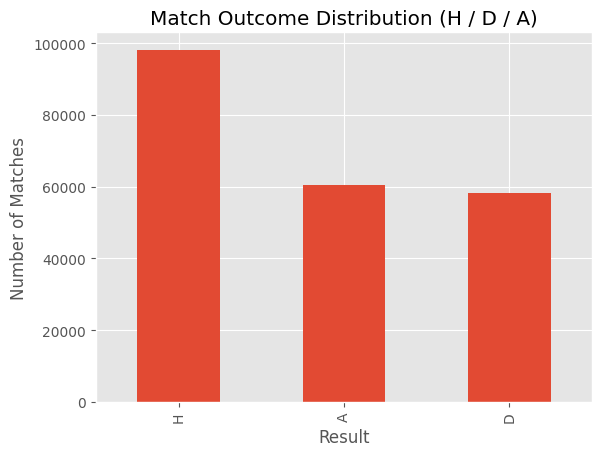

In [139]:
result_counts = df["Result"].value_counts()
result_pct = df["Result"].value_counts(normalize=True) * 100

print("Match outcome counts:\n", result_counts)
print("\nMatch outcome percentages (%):\n", result_pct.round(2))

ax = result_counts.plot(kind="bar", title="Match Outcome Distribution (H / D / A)")
ax.set_xlabel("Result")
ax.set_ylabel("Number of Matches")
plt.show()


### 3.2 Goal Distribution

Next, we examine how many goals are scored per match. 
We evaluate:

- Descriptive statistics of total goals
- Histogram of goal frequencies
- Most common scorelines
- Frequency of 0–0 draws
- Frequency of Over 2.5 goals
- Frequency of both teams scoring (BTTS)

These metrics reflect attacking trends and overall match intensity.


count    216883.000000
mean          2.624692
std           1.657941
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          13.000000
Name: Total Goals, dtype: float64


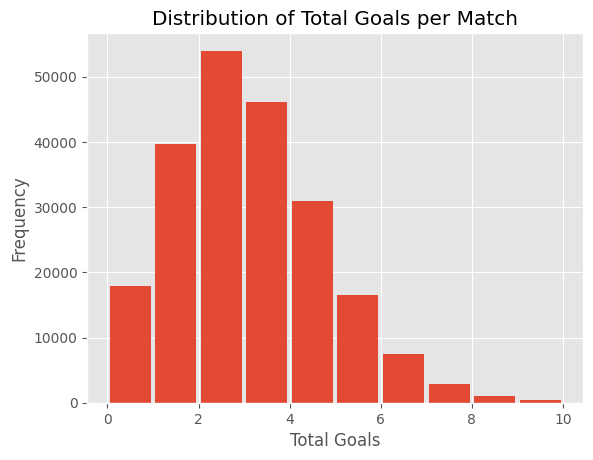

0–0 Draw Percentage: 8.25%
Top 10 Scorelines:
 Scoreline
1-1    27027
1-0    23243
2-1    19264
0-0    17889
2-0    17190
0-1    16446
1-2    13728
2-2    11042
0-2     9780
3-1     9164
Name: count, dtype: int64


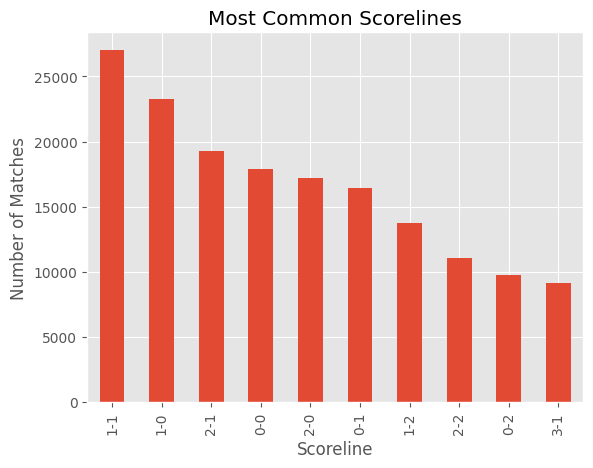

Over 2.5 Goals Rate: 19.13%
BTTS Rate: 51.35%


In [146]:
print(df["Total Goals"].describe())

ax = df["Total Goals"].plot(kind="hist", bins=range(0, 11), rwidth=0.9)
ax.set_title("Distribution of Total Goals per Match")
ax.set_xlabel("Total Goals")
plt.show()

zero_zero_pct = (df["Scoreline"] == "0-0").mean() * 100
print(f"0–0 Draw Percentage: {zero_zero_pct:.2f}%")

top_scorelines = df["Scoreline"].value_counts().head(10)
print("Top 10 Scorelines:\n", top_scorelines)

ax = top_scorelines.plot(kind="bar", title="Most Common Scorelines")
ax.set_xlabel("Scoreline")
ax.set_ylabel("Number of Matches")
plt.show()

print(f"Over 2.5 Goals Rate: {(df['Over 2.5'].mean()*100):.2f}%")
print(f"BTTS Rate: {(df['BTTS'].mean()*100):.2f}%")


In [148]:
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,Away Points,Winner,Loser,HomeCleanSheet,AwayCleanSheet,BTTS,Over 2.5,Under 2.5,Scoreline,Season
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,...,0,Home,Away,0,0,1,1,0,5-2,1993
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,...,0,Home,Away,1,0,0,0,1,2-0,1993
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,...,0,Home,Away,0,0,1,0,1,2-1,1993
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,...,0,Home,Away,1,0,0,0,1,1-0,1993
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,...,1,Draw,None,1,1,0,0,1,0-0,1993


### 3.3 Home Advantage

Home advantage is a well-established phenomenon in football. 
We quantify it by examining:

- Home win rate vs away win rate vs draw rate
- Average goals scored by home and away teams
- Distribution of goal differences
- Percentage of matches decided by one goal or less

These indicators reveal the extent to which playing at home impacts match outcomes.


Home Win Rate: 45.24%
Away Win Rate: 27.91%
Draw Rate: 26.85%


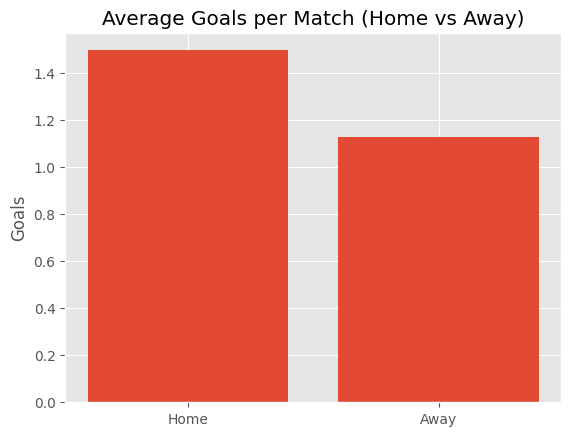

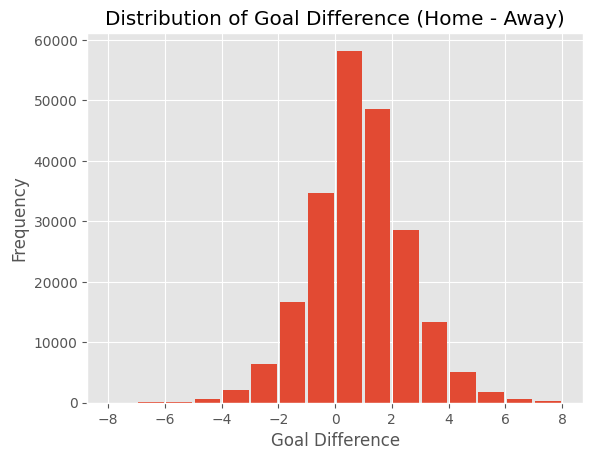

In [152]:
home_win_rate = df["HomeWin"].mean() * 100
away_win_rate = df["AwayWin"].mean() * 100
draw_rate     = df["Draw"].mean() * 100

print(f"Home Win Rate: {home_win_rate:.2f}%")
print(f"Away Win Rate: {away_win_rate:.2f}%")
print(f"Draw Rate: {draw_rate:.2f}%")

avg_home_goals = df["HomeGoals"].mean()
avg_away_goals = df["AwayGoals"].mean()

plt.bar(["Home", "Away"], [avg_home_goals, avg_away_goals])
plt.title("Average Goals per Match (Home vs Away)")
plt.ylabel("Goals")
plt.show()

ax = df["Goal Difference"].plot(kind="hist", bins=range(-8, 9), rwidth=0.9)
ax.set_title("Distribution of Goal Difference (Home - Away)")
ax.set_xlabel("Goal Difference")
plt.show()


### 3.4 Temporal Trends (Yearly and Seasonal)

Football evolves over time. 
We investigate:

- Number of matches per year
- Average goals per year
- Average goals per season (July–June)
- Long-term scoring trends

This reveals shifts in style, rule impacts, and league behaviour across decades.


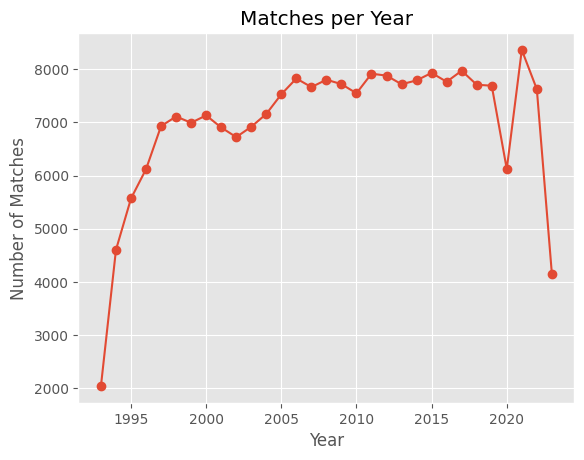

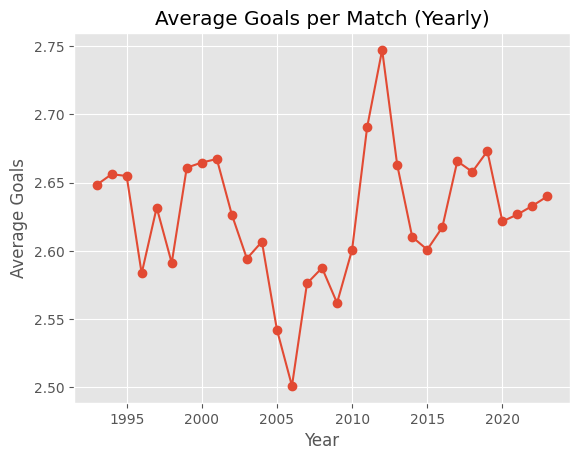

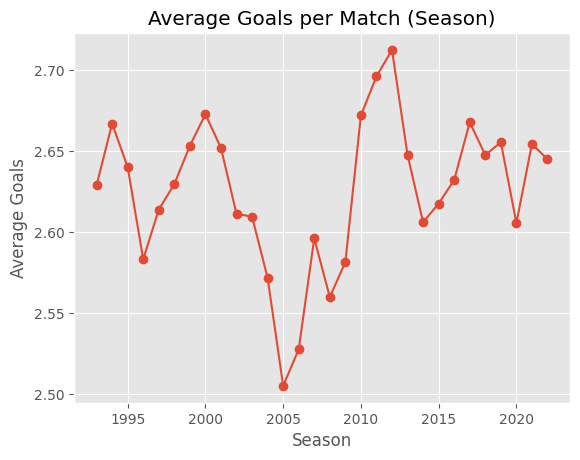

In [155]:
matches_per_year = df.groupby("Year").size()
matches_per_year.plot(kind="line", marker="o", title="Matches per Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()

avg_goals_per_year = df.groupby("Year")["Total Goals"].mean()
avg_goals_per_year.plot(kind="line", marker="o", title="Average Goals per Match (Yearly)")
plt.xlabel("Year")
plt.ylabel("Average Goals")
plt.show()

avg_goals_per_season = df.groupby("Season")["Total Goals"].mean()
avg_goals_per_season.plot(kind="line", marker="o", title="Average Goals per Match (Season)")
plt.xlabel("Season")
plt.ylabel("Average Goals")
plt.show()


### 3.5 Month and Day-of-Week Patterns

Match scheduling strongly influences football dynamics. 
We explore:

- How matches are distributed across months
- Which days of the week host the most matches
- Whether weekends have higher scoring rates


In [159]:
df.columns

Index(['League', 'Date', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals',
       'Result', 'Year', 'Month', 'Day of the week', 'Day of month',
       'Day Name', 'Total Goals', 'Goal Difference', 'Home_Points',
       'Away Points', 'Winner', 'Loser', 'HomeCleanSheet', 'AwayCleanSheet',
       'BTTS', 'Over 2.5', 'Under 2.5', 'Scoreline', 'Season', 'HomeWin',
       'AwayWin', 'Draw'],
      dtype='object')

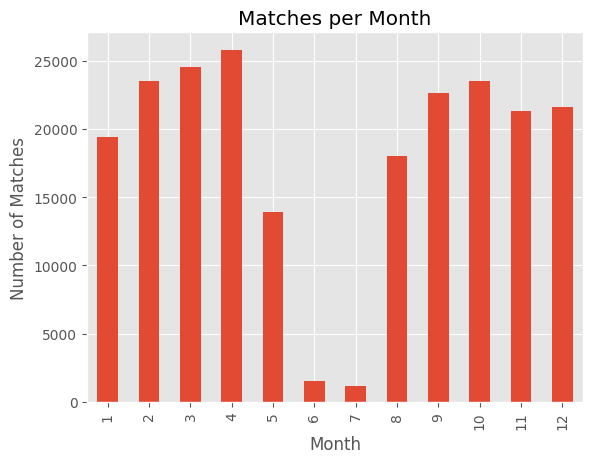

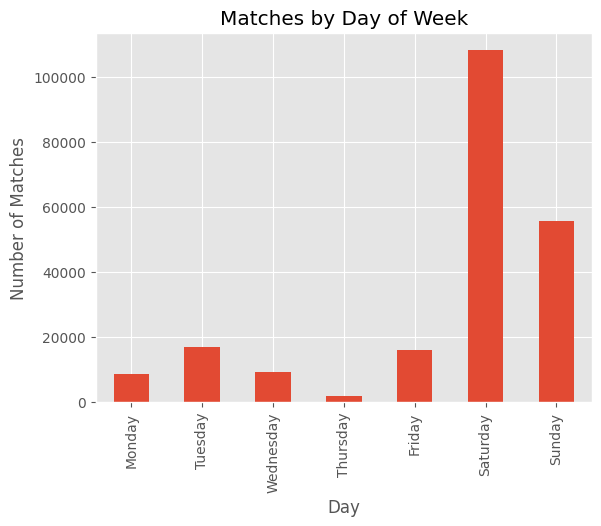

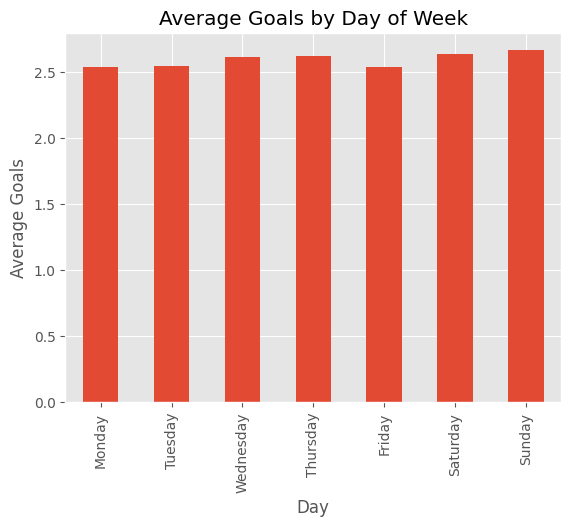

In [165]:
df.groupby("Month").size().plot(kind="bar", title="Matches per Month")
plt.xlabel("Month")
plt.ylabel("Number of Matches")
plt.show()

ordered_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

matches_per_day = df["Day Name"].value_counts().loc[ordered_days]
matches_per_day.plot(kind="bar", title="Matches by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Matches")
plt.show()

avg_goals_day = df.groupby("Day Name")["Total Goals"].mean().loc[ordered_days]
avg_goals_day.plot(kind="bar", title="Average Goals by Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Goals")
plt.show()


### 3.6 League-Level Analysis

Different leagues exhibit distinct scoring styles and competitive patterns.
We compute, for each league:

- Number of matches
- Average goals per match
- Home, draw, and away win rates
- Over 2.5 goals rate
- BTTS rate

This allows us to compare scoring intensity and competitiveness across leagues.


In [168]:
league_summary = (
    df.groupby("League")
      .agg(
          matches       = ("League", "size"),
          avg_goals     = ("Total Goals", "mean"),
          home_win_rate = ("HomeWin", "mean"),
          draw_rate     = ("Draw", "mean"),
          away_win_rate = ("AwayWin", "mean"),
          btts_rate     = ("BTTS", "mean"),
          over25_rate   = ("Over 2.5", "mean")
      )
)

league_summary[["home_win_rate","draw_rate","away_win_rate","btts_rate","over25_rate"]] *= 100

league_summary = league_summary.sort_values("avg_goals", ascending=False)

league_summary.head(10)


,matches,avg_goals,home_win_rate,draw_rate,away_win_rate,btts_rate,over25_rate
League,,,,,,,
Eredivisie,9106,3.059192,47.540083,23.424116,29.035801,55.315177,26.740611
Scottish Division 2,4569,2.932370,43.007223,23.462464,33.530313,56.051652,21.033049
Bundesliga,9180,2.919390,46.459695,25.424837,28.115468,55.806100,23.932462
Jupiler League,7770,2.889704,46.924067,24.247104,28.828829,54.787645,22.882883
Scottish Division 3,4567,2.884826,42.828991,21.786731,35.384279,53.010729,20.626232
Super Lig,9064,2.795455,47.076346,24.713151,28.210503,54.082083,21.778464
Bundesliga 2,9254,2.737519,45.699157,27.879836,26.421007,53.490383,21.666306
English Conference,9578,2.691063,43.307580,25.485488,31.206933,52.453539,18.803508
Scottish Division 1,5132,2.679657,41.212003,26.675760,32.112237,51.539361,18.335931


In [170]:
df.columns

Index(['League', 'Date', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals',
       'Result', 'Year', 'Month', 'Day of the week', 'Day of month',
       'Day Name', 'Total Goals', 'Goal Difference', 'Home_Points',
       'Away Points', 'Winner', 'Loser', 'HomeCleanSheet', 'AwayCleanSheet',
       'BTTS', 'Over 2.5', 'Under 2.5', 'Scoreline', 'Season', 'HomeWin',
       'AwayWin', 'Draw', 'Month Name'],
      dtype='object')

### 3.7 Correlation Analysis

We examine how different match features relate to each other, 
including goals, goal difference, points, clean sheets, BTTS, and Over 2.5.

This reveals underlying patterns in match dynamics.


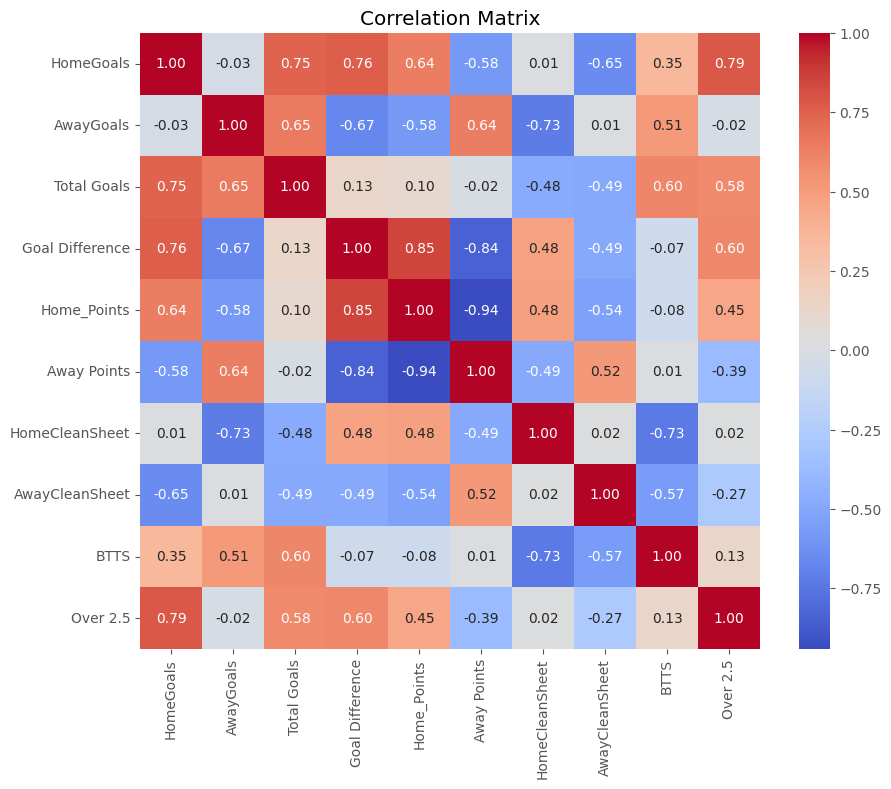

In [172]:
corr_cols = [
    "HomeGoals", "AwayGoals", "Total Goals",
    "Goal Difference",
    "Home_Points", "Away Points",
    "HomeCleanSheet", "AwayCleanSheet",
    "BTTS", "Over 2.5"
]

plt.figure(figsize=(10,8))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Step 4 — Team-Level Analysis

In this section we analyse individual team performance across seasons, focusing on:

- Win, draw, and loss distribution  
- Goals scored and conceded  
- Home vs away performance  
- Total points earned per season  
- Trend evolution over time  
- Most common scorelines  
- Performance on different days of the week  
- Opponent analysis (teams they perform well or poorly against)

This section provides a deeper understanding of the competitive identity of each team.


In [173]:
team = "Ath Madrid"   # ← you can change this to any team


In [174]:
team_matches = df[(df["HomeTeam"] == team) | (df["AwayTeam"] == team)]
team_matches.head()


,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,AwayCleanSheet,BTTS,Over 2.5,Under 2.5,Scoreline,Season,HomeWin,AwayWin,Draw,Month Name
993,La Liga,1993-09-05,Ath Madrid,Logrones,1.0,0.0,H,1993,9,6,...,0,0,0,1,1-0,1993,1,0,0,September
1010,La Liga,1993-09-12,Valencia,Ath Madrid,2.0,2.0,D,1993,9,6,...,0,1,0,1,2-2,1993,0,0,1,September
1013,La Liga,1993-09-19,Ath Madrid,Celta,3.0,2.0,H,1993,9,6,...,0,1,1,0,3-2,1993,1,0,0,September
1029,La Liga,1993-09-26,Sp Gijon,Ath Madrid,1.0,1.0,D,1993,9,6,...,0,1,0,1,1-1,1993,0,0,1,September
1033,La Liga,1993-10-03,Ath Madrid,Real Madrid,0.0,0.0,D,1993,10,6,...,1,0,0,1,0-0,1993,0,0,1,October


In [175]:
home_matches = df[df["HomeTeam"] == team]
away_matches = df[df["AwayTeam"] == team]


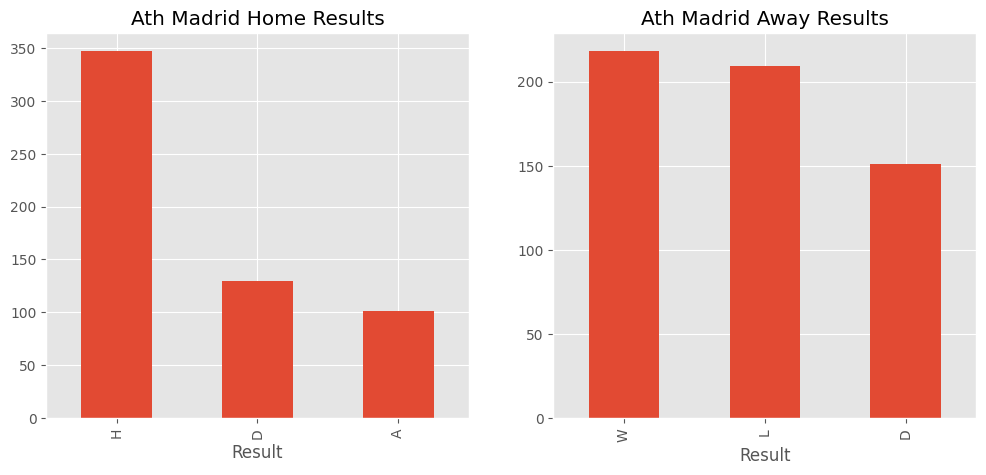

In [176]:
home_outcomes = home_matches["Result"].value_counts()
away_outcomes = away_matches["Result"].map({"H":"L","A":"W","D":"D"}).value_counts()

fig, ax = plt.subplots(1,2, figsize=(12,5))
home_outcomes.plot(kind="bar", ax=ax[0], title=f"{team} Home Results")
away_outcomes.plot(kind="bar", ax=ax[1], title=f"{team} Away Results")

plt.show()


C:\Users\alber\AppData\Local\Temp\ipykernel_20776\389434720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_matches["GoalsFor"] = team_matches.apply(
C:\Users\alber\AppData\Local\Temp\ipykernel_20776\389434720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_matches["GoalsAgainst"] = team_matches.apply(


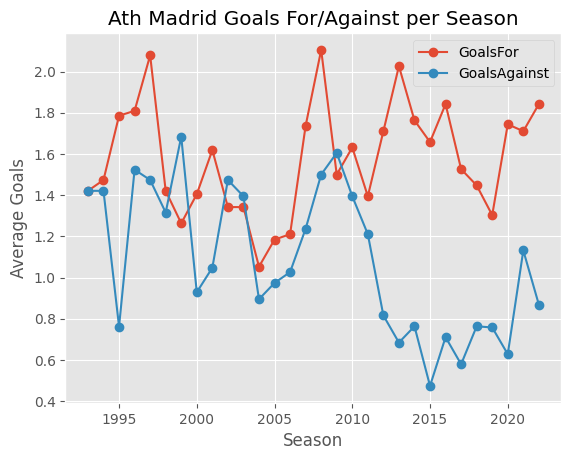

In [177]:
team_matches["GoalsFor"] = team_matches.apply(
    lambda x: x["HomeGoals"] if x["HomeTeam"] == team else x["AwayGoals"], axis=1)

team_matches["GoalsAgainst"] = team_matches.apply(
    lambda x: x["AwayGoals"] if x["HomeTeam"] == team else x["HomeGoals"], axis=1)

goals_year = team_matches.groupby("Season")[["GoalsFor", "GoalsAgainst"]].mean()

goals_year.plot(kind="line", marker="o", title=f"{team} Goals For/Against per Season")
plt.ylabel("Average Goals")
plt.show()


C:\Users\alber\AppData\Local\Temp\ipykernel_20776\4110743333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_matches["Points"] = team_matches.apply(


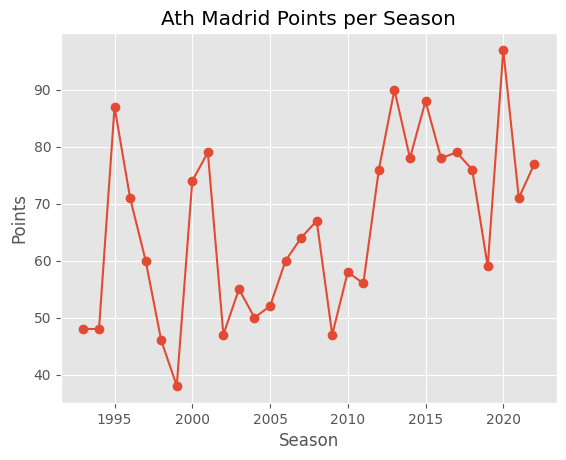

In [178]:
team_matches["Points"] = team_matches.apply(
    lambda x: 3 if (x["Winner"] == "Home" and x["HomeTeam"] == team)
    else 3 if (x["Winner"] == "Away" and x["AwayTeam"] == team)
    else 1 if x["Winner"] == "Draw"
    else 0,
    axis=1)

points_season = team_matches.groupby("Season")["Points"].sum()
points_season.plot(kind="line", marker="o", title=f"{team} Points per Season")
plt.ylabel("Points")
plt.show()


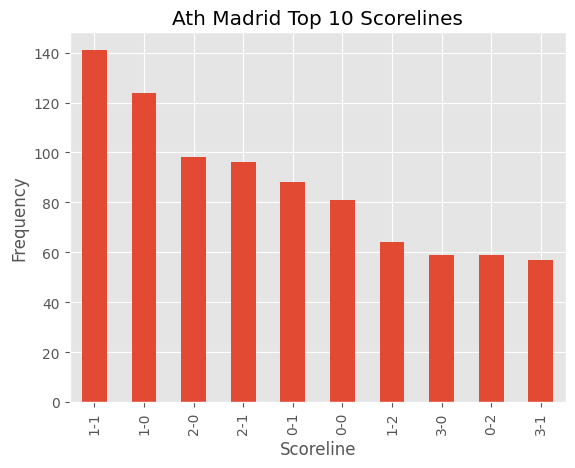

In [179]:
team_scorelines = team_matches["Scoreline"].value_counts().head(10)
team_scorelines.plot(kind="bar", title=f"{team} Top 10 Scorelines")
plt.xlabel("Scoreline")
plt.ylabel("Frequency")
plt.show()


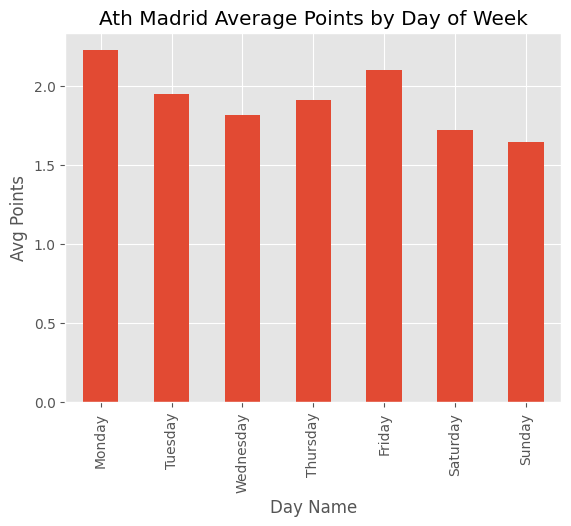

In [181]:
day_performance = (
    team_matches.groupby("Day Name")["Points"].mean()
    .loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
)

day_performance.plot(kind="bar", title=f"{team} Average Points by Day of Week")
plt.ylabel("Avg Points")
plt.show()


C:\Users\alber\AppData\Local\Temp\ipykernel_20776\2891727178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_matches["Opponent"] = team_matches.apply(


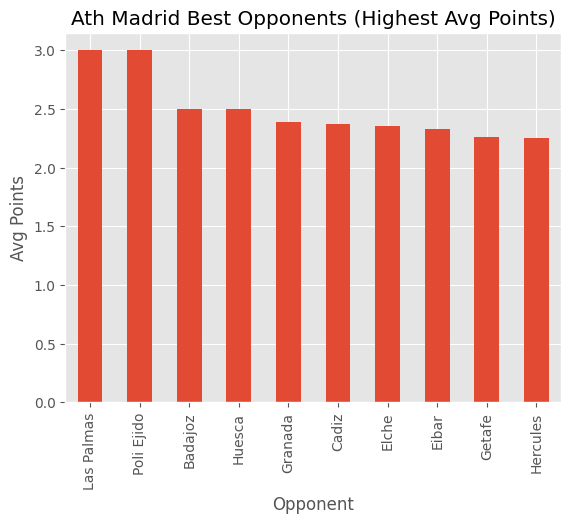

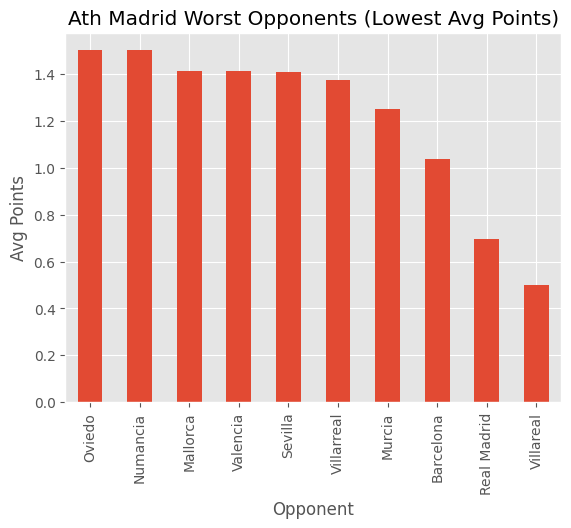

In [182]:
team_matches["Opponent"] = team_matches.apply(
    lambda x: x["AwayTeam"] if x["HomeTeam"] == team else x["HomeTeam"], axis=1)

opponent_points = team_matches.groupby("Opponent")["Points"].mean().sort_values(ascending=False)

opponent_points.head(10).plot(kind="bar", title=f"{team} Best Opponents (Highest Avg Points)")
plt.ylabel("Avg Points")
plt.show()

opponent_points.tail(10).plot(kind="bar", title=f"{team} Worst Opponents (Lowest Avg Points)")
plt.ylabel("Avg Points")
plt.show()


## Step 5 — League Table Reconstruction

In this section, we rebuild league tables for each season using the classical 
scoring system (3 points for a win, 1 for a draw, 0 for a loss). 

For each league and season, we calculate:

- Matches played  
- Wins, draws, losses  
- Goals scored and conceded  
- Goal difference  
- Total points  
- Points per match  
- Ranking position  

This enables a complete evaluation of league competitiveness and team performance across decades.


In [ ]:
df["GoalsFor"] = df.apply(
    lambda x: x["HomeGoals"] if x["HomeTeam"] == x["HomeTeam"] else x["AwayGoals"], axis=1
)
df["GoalsAgainst"] = df.apply(
    lambda x: x["AwayGoals"] if x["HomeTeam"] == x["HomeTeam"] else x["HomeGoals"], axis=1
)

### 5.1 Generate team-level match stats

We create a long-format table where each match becomes two rows: 
one for the home team and one for the away team. 
This allows us to aggregate the data by team, league, and season.


In [189]:
home_df = df[[
    "League", "Season", "Date", "HomeTeam", "HomeGoals", "AwayGoals",
    "Home_Points", "Winner"
]].copy()

home_df.rename(columns={
    "HomeTeam": "Team",
    "HomeGoals": "GoalsFor",
    "AwayGoals": "GoalsAgainst",
    "Home_Points": "Points"
}, inplace=True)

home_df["MatchResult"] = home_df["Winner"].map({"Home":"W","Away":"L","Draw":"D"})
home_df["Venue"] = "Home"


away_df = df[[
    "League", "Season", "Date", "AwayTeam", "HomeGoals", "AwayGoals",
    "Away Points", "Winner"
]].copy()

away_df.rename(columns={
    "AwayTeam": "Team",
    "AwayGoals": "GoalsFor",
    "HomeGoals": "GoalsAgainst",
    "Away_Points": "Points"
}, inplace=True)

away_df["MatchResult"] = away_df["Winner"].map({"Away":"W","Home":"L","Draw":"D"})
away_df["Venue"] = "Away"


# Combine both
team_long = pd.concat([home_df, away_df], ignore_index=True)
team_long.head()


,League,Season,Date,Team,GoalsFor,GoalsAgainst,Points,Winner,MatchResult,Venue,Away Points
0,Serie A,1993,1993-08-29,Atalanta,5.0,2.0,3.0,Home,W,Home,NaN
1,Serie A,1993,1993-08-29,Genoa,2.0,0.0,3.0,Home,W,Home,NaN
2,Serie A,1993,1993-08-29,Inter,2.0,1.0,3.0,Home,W,Home,NaN
3,Serie A,1993,1993-08-29,Juventus,1.0,0.0,3.0,Home,W,Home,NaN
4,Serie A,1993,1993-08-29,Lazio,0.0,0.0,1.0,Draw,D,Home,NaN


### 5.2 Compute League Table per Season

We now aggregate the match-level data into a complete league table for each season.


In [200]:
league_table = (
    team_long
    .groupby(["League", "Season", "Team"])
    .agg(
        Matches       = ("Team", "size"),
        Wins          = ("MatchResult", lambda x: (x == "W").sum()),
        Draws         = ("MatchResult", lambda x: (x == "D").sum()),
        Losses        = ("MatchResult", lambda x: (x == "L").sum()),
        GoalsFor      = ("GoalsFor", "sum"),
        GoalsAgainst  = ("GoalsAgainst", "sum"),
    )
    .reset_index()
)

league_table.head(20)

,League,Season,Team,Matches,Wins,Draws,Losses,GoalsFor,GoalsAgainst
0,Bundesliga,1993,Bayern Munich,34,17,10,7,68.0,37.0
1,Bundesliga,1993,Dortmund,34,15,9,10,49.0,45.0
2,Bundesliga,1993,Dresden,34,10,14,10,33.0,44.0
3,Bundesliga,1993,Duisburg,34,14,8,12,41.0,52.0
4,Bundesliga,1993,Ein Frankfurt,34,15,8,11,57.0,41.0
5,Bundesliga,1993,FC Koln,34,14,6,14,49.0,51.0
6,Bundesliga,1993,Freiburg,34,10,8,16,54.0,57.0
7,Bundesliga,1993,Hamburg,34,13,8,13,48.0,52.0
8,Bundesliga,1993,Kaiserslautern,34,18,7,9,64.0,36.0
9,Bundesliga,1993,Karlsruhe,34,14,10,10,46.0,43.0


In [201]:
league_table["GoalDifference"] = league_table["GoalsFor"] - league_table["GoalsAgainst"]
league_table["Points"] = league_table["Wins"] * 3 + league_table["Draws"]
league_table["PointsPerMatch"] = league_table["Points"] / league_table["Matches"]

### 5.3 League Standings for a Selected Season

We sort the table by Points, Goal Difference, and Goals For — 
just like real football league rules.


In [204]:
selected_league = "English Premier League"
selected_season = 2015

table = (
    league_table[
        (league_table["League"] == selected_league) &
        (league_table["Season"] == selected_season)
    ]
    .sort_values(["Points", "GoalDifference", "GoalsFor"], ascending=False)
)

table.reset_index(drop=True).head(20)


,League,Season,Team,Matches,Wins,Draws,Losses,GoalsFor,GoalsAgainst,GoalDifference,Points,PointsPerMatch
0,English Premier League,2015,Leicester,38,23,12,3,68.0,36.0,32.0,81,2.131579
1,English Premier League,2015,Arsenal,38,20,11,7,65.0,36.0,29.0,71,1.868421
2,English Premier League,2015,Tottenham,38,19,13,6,69.0,35.0,34.0,70,1.842105
3,English Premier League,2015,Man City,38,19,9,10,71.0,41.0,30.0,66,1.736842
4,English Premier League,2015,Man United,38,19,9,10,49.0,35.0,14.0,66,1.736842
5,English Premier League,2015,Southampton,38,18,9,11,59.0,41.0,18.0,63,1.657895
6,English Premier League,2015,West Ham,38,16,14,8,65.0,51.0,14.0,62,1.631579
7,English Premier League,2015,Liverpool,38,16,12,10,63.0,50.0,13.0,60,1.578947
8,English Premier League,2015,Stoke,38,14,9,15,41.0,55.0,-14.0,51,1.342105
9,English Premier League,2015,Chelsea,38,12,14,12,59.0,53.0,6.0,50,1.315789


### 5.4 Scatter Plot: Points vs Goal Difference

Plotting points against goal difference shows how strong teams separate from the rest.


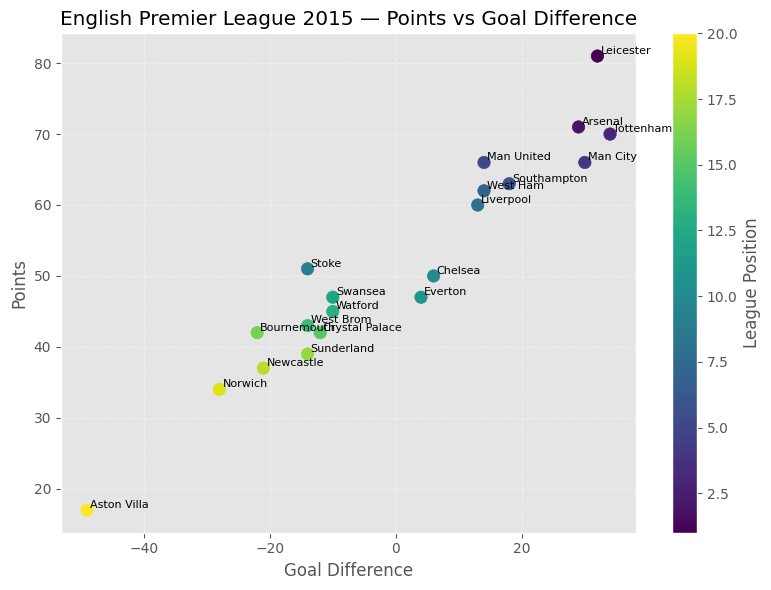

In [ ]:
table = table.sort_values(["Points", "GoalDifference", "GoalsFor"], ascending=False)
table["Position"] = range(1, len(table) + 1)

fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(
    table["GoalDifference"],
    table["Points"],
    c=table["Position"],
    cmap="viridis",
    s=80
)

for _, row in table.iterrows():
    ax.text(
        row["GoalDifference"] + 0.5,
        row["Points"] + 0.3,
        row["Team"],
        fontsize=8
    )

ax.set_title(f"{selected_league} {selected_season} — Points vs Goal Difference")
ax.set_xlabel("Goal Difference")
ax.set_ylabel("Points")
ax.grid(True, linestyle="--", alpha=0.4)

cbar = plt.colorbar(scatter)
cbar.set_label("League Position")

plt.tight_layout()
plt.show()


### 5.5 Attack vs Defence Map

This chart compares each team's attacking strength (goals for) vs defensive weakness (goals conceded).


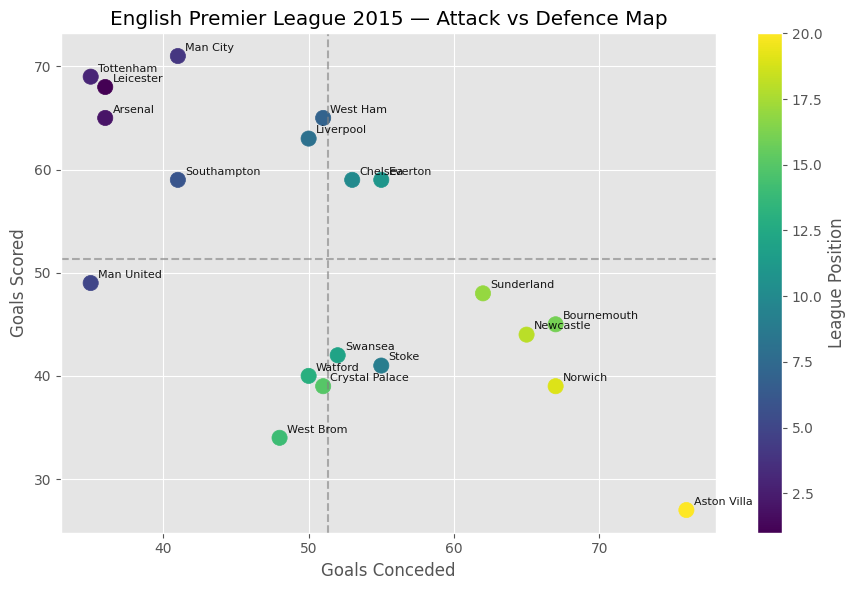

In [208]:
table = table.sort_values(["Points", "GoalDifference", "GoalsFor"], ascending=False)
table["Position"] = range(1, len(table) + 1)

fig, ax = plt.subplots(figsize=(9, 6))

scatter = ax.scatter(
    table["GoalsAgainst"], 
    table["GoalsFor"],
    c=table["Position"], 
    cmap="viridis", 
    s=120
)

for _, row in table.iterrows():
    ax.text(
        row["GoalsAgainst"] + 0.5,
        row["GoalsFor"] + 0.5,
        row["Team"],
        fontsize=8,
        alpha=0.9
    )

ax.axhline(table["GoalsFor"].mean(), color="gray", linestyle="--", alpha=0.6)
ax.axvline(table["GoalsAgainst"].mean(), color="gray", linestyle="--", alpha=0.6)

plt.colorbar(scatter, label="League Position")

ax.set_title(f"{selected_league} {selected_season} — Attack vs Defence Map")
ax.set_xlabel("Goals Conceded")
ax.set_ylabel("Goals Scored")
plt.tight_layout()
plt.show()


### 5.6 Points per Season Trend

This line plot shows how a team evolves across multiple seasons.


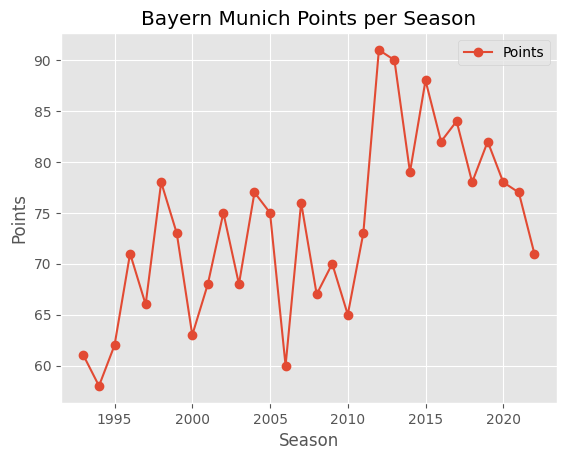

In [212]:
team_name = "Bayern Munich"

team_season_trend = (
    league_table[league_table["Team"] == team_name]
    .sort_values("Season")
)

team_season_trend.plot(
    x="Season",
    y="Points",
    marker="o",
    title=f"{team_name} Points per Season"
)
plt.ylabel("Points")
plt.show()


## Step 6 — Advanced Analytics & Insights

After reconstructing league tables and team-level performance, we now explore more advanced 
football analytics concepts, including:

- Strength radar profiles  
- Team form across the season  
- Points trajectory and momentum  
- Goal timing patterns  
- Match competitiveness analysis  
- Over/Under and BTTS behavioural patterns  
- Opponent-style clustering  
- League parity measures  

These analyses provide deeper insight into team identity, offensive/defensive behaviour,
and long-term trends.


### 6.1 Team Momentum Curve (Rolling Points)

We analyse the short-term form of a team by plotting a rolling average of points 
earned over time. This reveals hot streaks and slumps during a season.


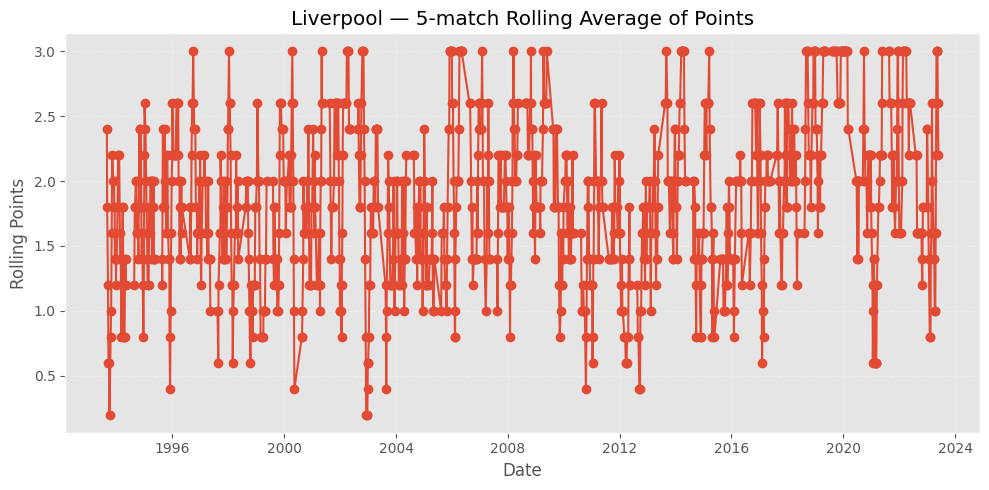

In [215]:

team = "Liverpool"   # change this to any team

# All matches for this team
team_matches = df[(df["HomeTeam"] == team) | (df["AwayTeam"] == team)].copy()
team_matches = team_matches.sort_values("Date")

# Points from this team's perspective
team_matches["Points"] = np.where(
    ((team_matches["Result"] == "H") & (team_matches["HomeTeam"] == team)) |
    ((team_matches["Result"] == "A") & (team_matches["AwayTeam"] == team)),
    3,
    np.where(team_matches["Result"] == "D", 1, 0)
)

# Rolling average over last 5 games
team_matches["RollingPoints"] = team_matches["Points"].rolling(window=5).mean()

plt.figure(figsize=(10,5))
plt.plot(team_matches["Date"], team_matches["RollingPoints"], marker="o")
plt.title(f"{team} — 5-match Rolling Average of Points")
plt.xlabel("Date")
plt.ylabel("Rolling Points")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


### 6.2 Match Competitiveness (Goal Margin)

We examine how often matches are decided by different goal margins. 
A high share of 0–1 goal differences indicates a tightly balanced competition.


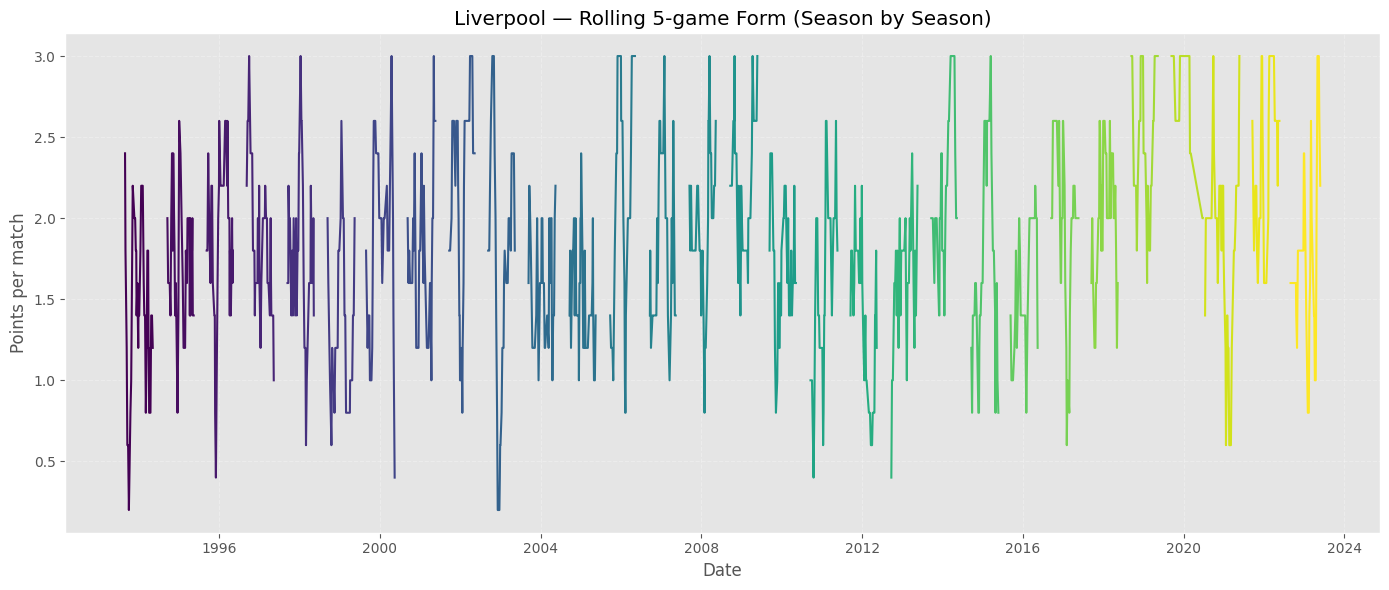

In [ ]:

team = "Liverpool"

team_matches = df[(df["HomeTeam"] == team) | (df["AwayTeam"] == team)].copy()
team_matches = team_matches.sort_values(["Season", "Date"])

team_matches["Points"] = np.where(
    (team_matches["Result"] == "H") & (team_matches["HomeTeam"] == team)
    | (team_matches["Result"] == "A") & (team_matches["AwayTeam"] == team),
    3,
    np.where(team_matches["Result"] == "D", 1, 0)
)

team_matches["RollingForm"] = team_matches.groupby("Season")["Points"].rolling(window=5).mean().reset_index(level=0, drop=True)

plt.figure(figsize=(14,6))
sns.lineplot(data=team_matches, x="Date", y="RollingForm", hue="Season", palette="viridis", legend=False)
plt.title(f"{team} — Rolling 5-game Form (Season by Season)")
plt.ylabel("Points per match")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()



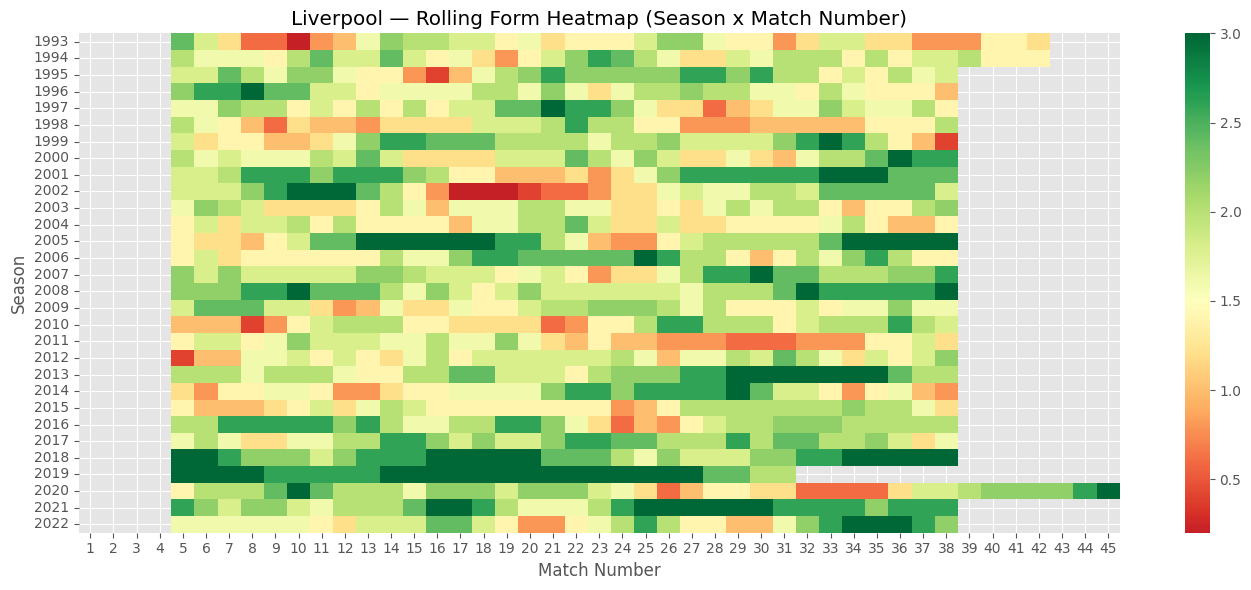

In [218]:
team = "Liverpool"

team_matches = df[(df["HomeTeam"] == team) | (df["AwayTeam"] == team)].copy()
team_matches = team_matches.sort_values(["Season", "Date"])

# Compute points
team_matches["Points"] = np.where(
    ((team_matches["Result"] == "H") & (team_matches["HomeTeam"] == team)) |
    ((team_matches["Result"] == "A") & (team_matches["AwayTeam"] == team)),
    3,
    np.where(team_matches["Result"] == "D", 1, 0)
)

team_matches["MatchNumber"] = team_matches.groupby("Season").cumcount() + 1
team_matches["RollingForm"] = team_matches.groupby("Season")["Points"].rolling(window=5).mean().reset_index(level=0, drop=True)

heatmap_data = team_matches.pivot(index="Season", columns="MatchNumber", values="RollingForm")

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="RdYlGn", center=1.5, linewidths=0)
plt.title(f"{team} — Rolling Form Heatmap (Season x Match Number)")
plt.xlabel("Match Number")
plt.ylabel("Season")
plt.tight_layout()
plt.show()


In [221]:
# I create a absolute goals difference column for the next graph
df["AbsGoalDifference"] = df["Goal Difference"].abs()
df.head(5)

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day of the week,...,Under 2.5,Scoreline,Season,HomeWin,AwayWin,Draw,Month Name,GoalsFor,GoalsAgainst,AbsGoalDifference
0,Serie A,1993-08-29,Atalanta,Cagliari,5.0,2.0,H,1993,8,6,...,0,5-2,1993,1,0,0,August,5.0,2.0,3.0
1,Serie A,1993-08-29,Genoa,Roma,2.0,0.0,H,1993,8,6,...,1,2-0,1993,1,0,0,August,2.0,0.0,2.0
2,Serie A,1993-08-29,Inter,Reggiana,2.0,1.0,H,1993,8,6,...,1,2-1,1993,1,0,0,August,2.0,1.0,1.0
3,Serie A,1993-08-29,Juventus,Cremonese,1.0,0.0,H,1993,8,6,...,1,1-0,1993,1,0,0,August,1.0,0.0,1.0
4,Serie A,1993-08-29,Lazio,Foggia,0.0,0.0,D,1993,8,6,...,1,0-0,1993,0,0,1,August,0.0,0.0,0.0


### 6.2 Match Competitiveness (Goal Margin)

We examine how often matches are decided by different goal margins. 
A high share of 0–1 goal differences indicates a tightly balanced competition.


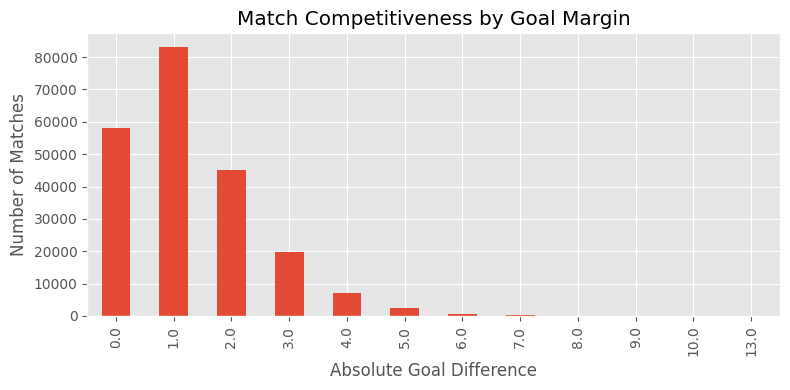

Matches decided by 0 or 1 goal: 65.19%


In [222]:
margin_counts = df["AbsGoalDifference"].value_counts().sort_index()

ax = margin_counts.plot(
    kind="bar", figsize=(8,4),
    title="Match Competitiveness by Goal Margin"
)
ax.set_xlabel("Absolute Goal Difference")
ax.set_ylabel("Number of Matches")
plt.tight_layout()
plt.show()

close_games_rate = (df["AbsGoalDifference"] <= 1).mean() * 100
print(f"Matches decided by 0 or 1 goal: {close_games_rate:.2f}%")


### 6.3 Over 2.5 Goals by League

We compare how goal-rich each league is by computing the percentage of matches
with more than 2.5 total goals.


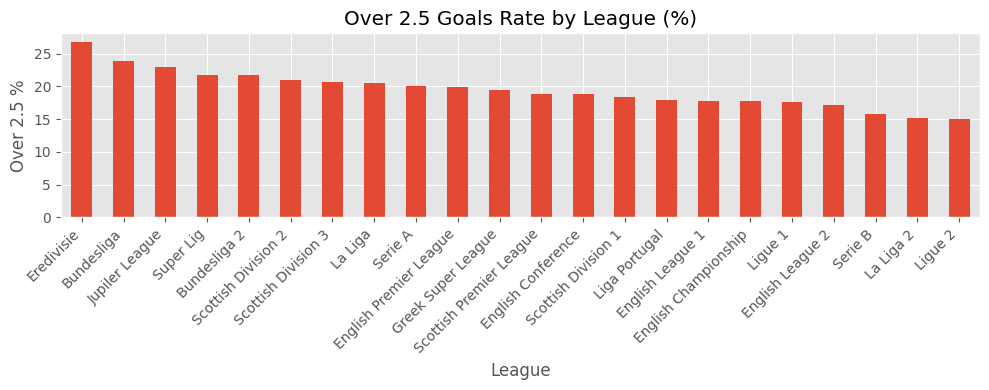

In [224]:
over_by_league = df.groupby("League")["Over 2.5"].mean().sort_values(ascending=False) * 100

ax = over_by_league.plot(
    kind="bar", figsize=(10,4),
    title="Over 2.5 Goals Rate by League (%)"
)
ax.set_ylabel("Over 2.5 %")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 6.5 Opponent Difficulty Map

For a given team, we compute the average number of points earned against each opponent.
This highlights which teams they consistently perform well against, and which teams
tend to cause them problems.


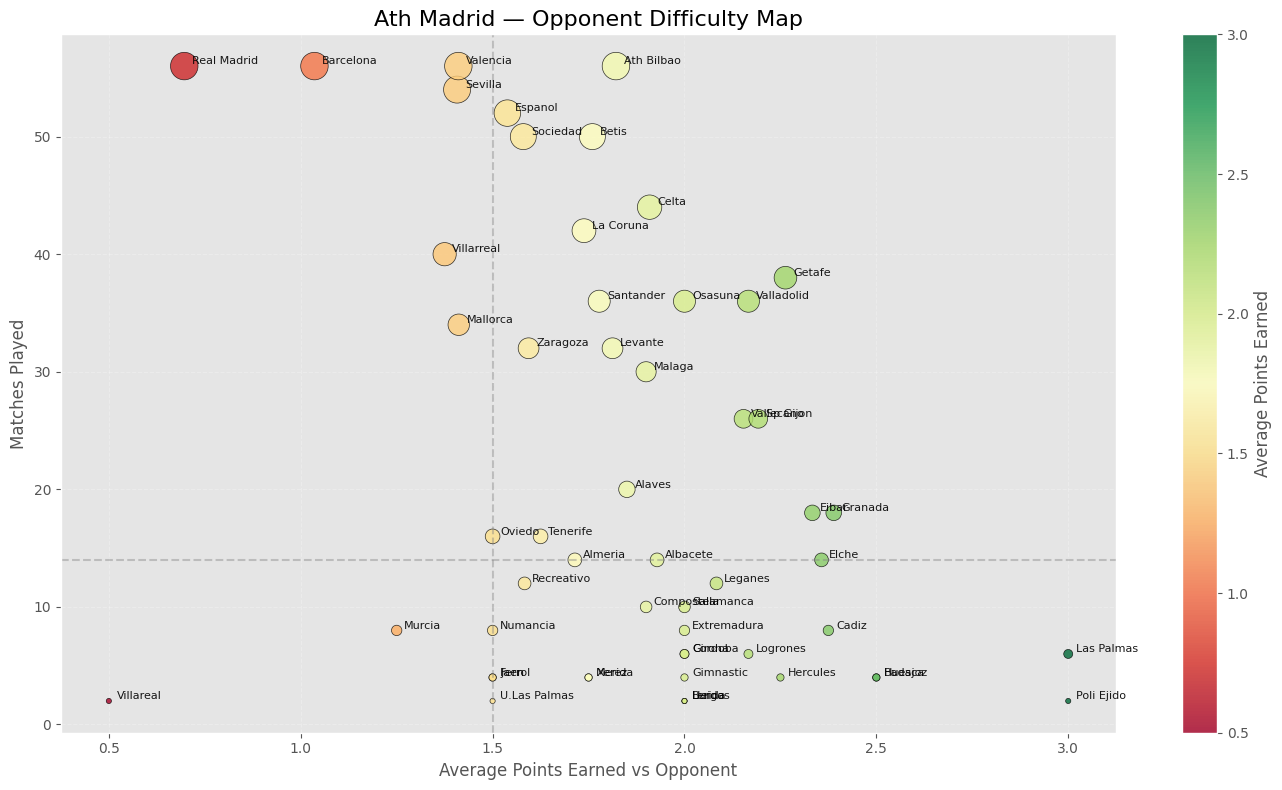

In [229]:
team = "Ath Madrid"   # change to any team you want

# Filter matches for the selected team
team_matches = df[(df["HomeTeam"] == team) | (df["AwayTeam"] == team)].copy()

# Points from team's perspective
team_matches["Points"] = np.where(
    ((team_matches["Result"] == "H") & (team_matches["HomeTeam"] == team)) |
    ((team_matches["Result"] == "A") & (team_matches["AwayTeam"] == team)),
    3,
    np.where(team_matches["Result"] == "D", 1, 0)
)

# Determine opponent
team_matches["Opponent"] = np.where(
    team_matches["HomeTeam"] == team,
    team_matches["AwayTeam"],
    team_matches["HomeTeam"]
)

# Opponent aggregated stats
opp_stats = (
    team_matches
    .groupby("Opponent")
    .agg(
        AvgPoints=("Points", "mean"),
        Matches=("Points", "size")
    )
    .sort_values("AvgPoints")
)

plt.figure(figsize=(14, 8))

# Bubble scatter with color = AvgPoints, size = Matches
scatter = plt.scatter(
    opp_stats["AvgPoints"],
    opp_stats["Matches"],
    s=opp_stats["Matches"] * 7,       # larger bubbles for more matches
    c=opp_stats["AvgPoints"],
    cmap="RdYlGn",
    alpha=0.80,
    edgecolor="black",
    linewidth=0.5
)

# Add ALL opponent names, gently staggered to avoid overlap
for name, row in opp_stats.iterrows():
    plt.text(
        row["AvgPoints"] + 0.02,        # slight X shift
        row["Matches"] + 0.15,          # slight Y shift
        name,
        fontsize=8,
        alpha=0.9
    )

# Reference lines for interpretation
plt.axvline(1.5, color="gray", linestyle="--", alpha=0.4)
plt.axhline(opp_stats["Matches"].median(), color="gray", linestyle="--", alpha=0.4)

plt.title(f"{team} — Opponent Difficulty Map", fontsize=16)
plt.xlabel("Average Points Earned vs Opponent", fontsize=12)
plt.ylabel("Matches Played", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.25)

# Colorbar for AvgPoints scale
cbar = plt.colorbar(scatter)
cbar.set_label("Average Points Earned", fontsize=12)

plt.tight_layout()
plt.show()


### 6.6 League Parity (Competitive Balance)

Using the reconstructed league tables, we measure how balanced each league is by
computing the standard deviation of total points across teams.  

- Lower standard deviation → teams finish with similar points → more parity  
- Higher standard deviation → big gaps between top and bottom → more dominance


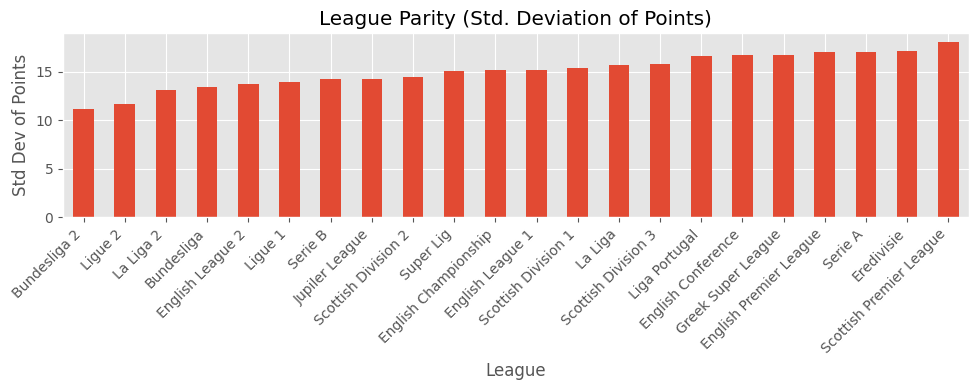

In [226]:
parity = league_table.groupby("League")["Points"].std().sort_values()

ax = parity.plot(
    kind="bar", figsize=(10,4),
    title="League Parity (Std. Deviation of Points)"
)
ax.set_ylabel("Std Dev of Points")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Step 7 — Predictive Modelling (Home Win Probability)

In this final step we build a simple predictive model to estimate the probability 
that the home team wins a match.

**Important note:**  
The aim here is educational. We use season-level team strength metrics (points per 
match, goal difference) which are calculated from the final table. In a real betting 
or forecasting context we would restrict information to what is known *before* the 
match (rolling stats, ratings, etc.).

The workflow is:

1. Create team strength features from the reconstructed league tables  
2. Merge those features back into the match-level dataset  
3. Encode the target variable (home win vs not home win)  
4. Split into train and test sets by time  
5. Fit a simple logistic regression model  
6. Evaluate accuracy and error types  
7. Interpret the coefficients and limitations


### 7.1 Data Preparation

We first construct the input features and target variable for the model.

- Features:
  - `Delta_PPM`: difference in points per match between home and away teams
  - `Delta_GDpm`: difference in goal difference per match

- Target:
  - `HomeWinFlag`: 1 if the match ends in a home win, 0 otherwise

We also split the data into a training set (older seasons) and a test set (more recent seasons) to mimic a real prediction scenario.


In [239]:

# 1) Select features and target
feature_cols = ["Delta_PPM", "Delta_GDpm"]   # change if your column names differ
target_col = "HomeWinFlag"

# 2) Drop rows with missing data
model_data = matches.dropna(subset=feature_cols + [target_col]).copy()
print("Model dataset shape:", model_data.shape)

# 3) Time-based split: train on older seasons, test on newer
train_mask = model_data["Season"] < 2015    # you can change the year cutoff

X_train = model_data.loc[train_mask, feature_cols]
y_train = model_data.loc[train_mask, target_col]

X_test  = model_data.loc[~train_mask, feature_cols]
y_test  = model_data.loc[~train_mask, target_col]

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Model dataset shape: (216883, 49)
Train size: 155561
Test size: 61322


### 7.2 Model Training (Logistic Regression)

We fit a logistic regression model to predict whether the home team wins (1) or not (0)
based on the feaure differences.


In [240]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

print("Model trained.")
print("Intercept:", log_reg.intercept_)
print("Coefficients:", dict(zip(feature_cols, log_reg.coef_[0])))


Model trained.
Intercept: [-0.19070645]
Coefficients: {'Delta_PPM': np.float64(1.3503906049478558), 'Delta_GDpm': np.float64(0.17861711902231184)}


### 7.3 Predictions and Probabilities

Once trained, the model can:
- Predict the class (home win or not)
- Predict the probability that the home team wins

We inspect a few example predictions to understand what the model is doing.


In [241]:
# Class predictions (0 or 1)
y_pred = log_reg.predict(X_test)

# Probabilities for the class "1" (home win)
y_proba = log_reg.predict_proba(X_test)[:, 1]

print("First 20 predicted classes:", y_pred[:20].tolist())
print("First 20 true classes     :", y_test.iloc[:20].tolist())
print("First 20 predicted probs  :", np.round(y_proba[:20], 3))


First 20 predicted classes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]
First 20 true classes     : [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
First 20 predicted probs  : [0.368 0.153 0.322 0.488 0.37  0.256 0.169 0.17  0.295 0.318 0.59  0.341
 0.614 0.806 0.76  0.647 0.838 0.349 0.604 0.491]


### 7.4 Evaluation Metrics

We evaluate the model on the test set using:

- Accuracy
- Confusion matrix
- Precision, recall and F1-score (classification report)

We also compare against a simple baseline that always predicts the most
frequent class from the training data.


In [242]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("=== EVALUATION METRICS ===")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))

# Baseline: always predict the most common class in training
baseline_class = int(y_train.value_counts().idxmax())
baseline_pred = np.full_like(y_test, fill_value=baseline_class)
baseline_acc = accuracy_score(y_test, baseline_pred)
print(f"\nBaseline accuracy (always predict {baseline_class}): {baseline_acc:.4f}")


=== EVALUATION METRICS ===
Accuracy: 0.6657

Confusion matrix:
[[25145  9466]
 [11034 15677]]

Classification report:
              precision    recall  f1-score   support

           0      0.695     0.727     0.710     34611
           1      0.624     0.587     0.605     26711

    accuracy                          0.666     61322
   macro avg      0.659     0.657     0.658     61322
weighted avg      0.664     0.666     0.664     61322


Baseline accuracy (always predict 0): 0.5644


### 7.5 Visual Evaluation (ROC Curve and Probability Distributions)

To better understand model performance, we plot:

- ROC Curve: shows the trade-off between true positive rate and false positive rate.
- AUC (Area Under the Curve): summarises the ROC curve into a single number.
- Probability histograms: show how the model distributes predicted probabilities
  for matches that were actually home wins vs matches that were not.


AUC: 0.7226


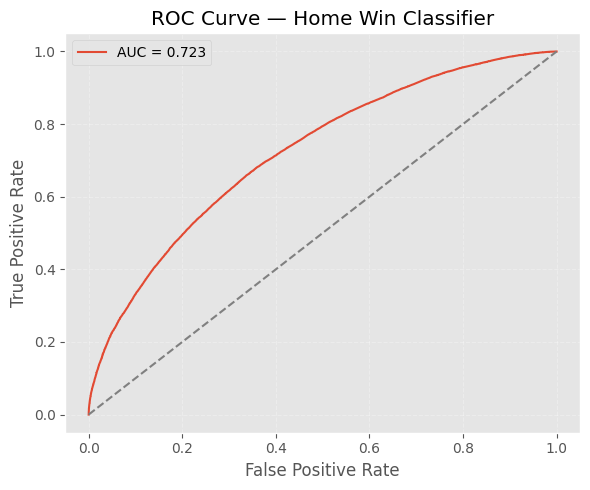

In [243]:

auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Home Win Classifier")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


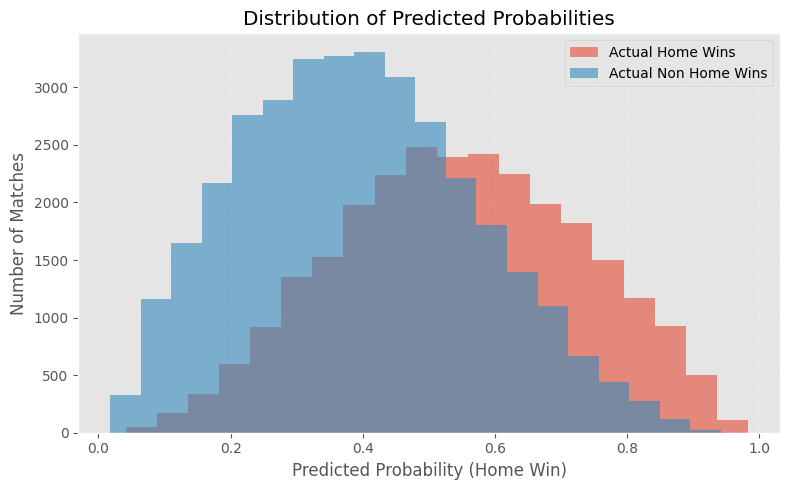

In [244]:
plt.figure(figsize=(8,5))
plt.hist(y_proba[y_test == 1], bins=20, alpha=0.6, label="Actual Home Wins")
plt.hist(y_proba[y_test == 0], bins=20, alpha=0.6, label="Actual Non Home Wins")
plt.xlabel("Predicted Probability (Home Win)")
plt.ylabel("Number of Matches")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


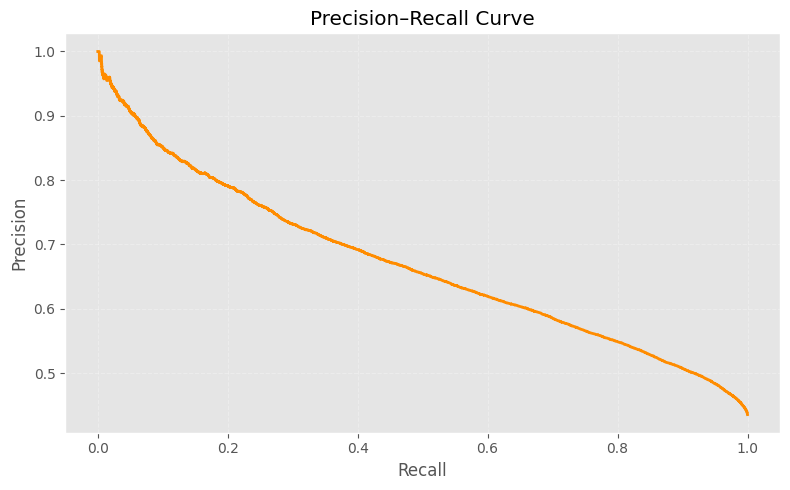

In [246]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,5))
plt.plot(recall, precision, color="darkorange", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


c:\Users\alber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


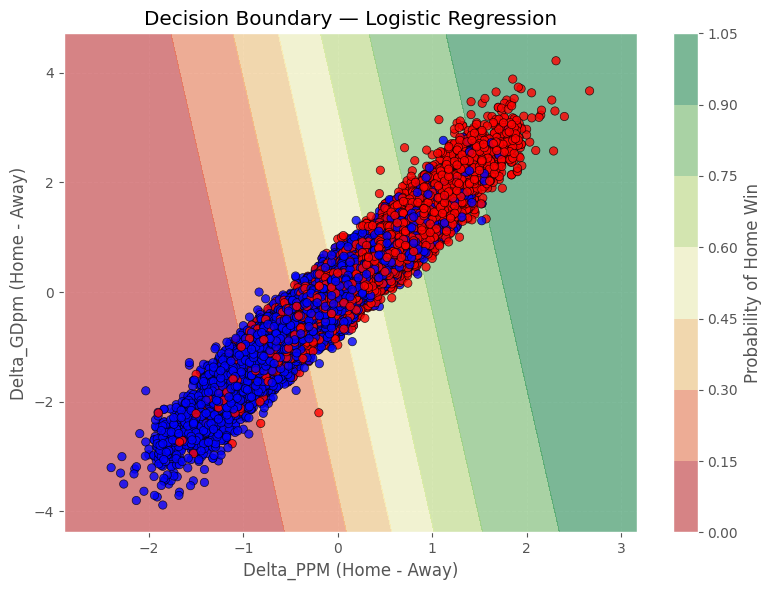

In [248]:
import numpy as np

# Create a mesh grid
x_min, x_max = X_test["Delta_PPM"].min()-0.5, X_test["Delta_PPM"].max()+0.5
y_min, y_max = X_test["Delta_GDpm"].min()-0.5, X_test["Delta_GDpm"].max()+0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:,1].reshape(xx.shape)

plt.figure(figsize=(8,6))
contour = plt.contourf(xx, yy, probs, cmap="RdYlGn", alpha=0.5)

plt.scatter(X_test["Delta_PPM"], X_test["Delta_GDpm"],
            c=y_test, cmap="bwr", edgecolors="k", alpha=0.8)

plt.colorbar(contour, label="Probability of Home Win")
plt.xlabel("Delta_PPM (Home - Away)")
plt.ylabel("Delta_GDpm (Home - Away)")
plt.title("Decision Boundary — Logistic Regression")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


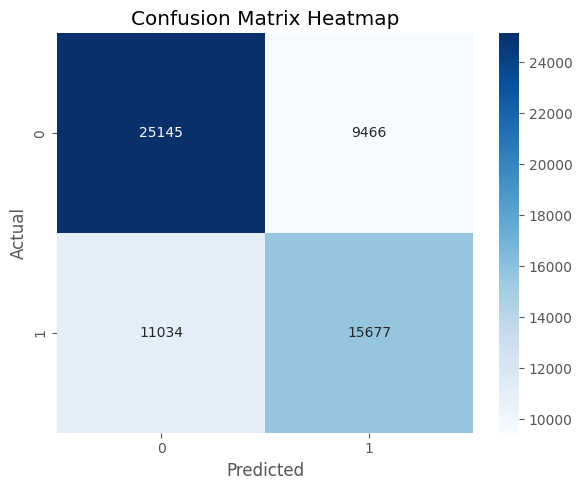

In [ ]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()


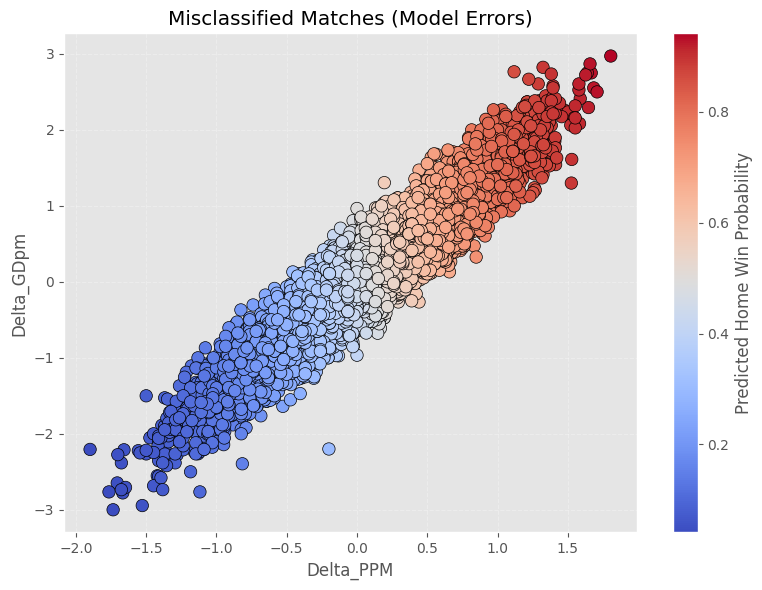

In [250]:
errors = X_test.copy()
errors["True"] = y_test
errors["Pred"] = y_pred
errors["Proba"] = y_proba

wrong = errors[errors["True"] != errors["Pred"]]

plt.figure(figsize=(8,6))
plt.scatter(
    wrong["Delta_PPM"], wrong["Delta_GDpm"],
    s=80,
    c=wrong["Proba"],
    cmap="coolwarm",
    edgecolor="black"
)
plt.colorbar(label="Predicted Home Win Probability")
plt.xlabel("Delta_PPM")
plt.ylabel("Delta_GDpm")
plt.title("Misclassified Matches (Model Errors)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


### 7.6 Attach Predictions to Match Data

To visualise model behaviour, we attach the predicted class and probability for each 
test match back to the original match-level data.


In [251]:
# Start from the same model_data used in training/testing
test_matches = model_data.loc[~train_mask].copy()

# Make sure index aligns with X_test / y_test
# (they should already align if we created X_test from model_data[~train_mask])
test_matches["Predicted_HomeWin"] = y_pred
test_matches["Predicted_Proba"]   = y_proba
test_matches["True_HomeWin"]      = y_test.values

test_matches[[
    "League", "Season", "Date", "HomeTeam", "AwayTeam",
    "Delta_PPM", "Delta_GDpm",
    "True_HomeWin", "Predicted_HomeWin", "Predicted_Proba"
]].head()


,League,Season,Date,HomeTeam,AwayTeam,Delta_PPM,Delta_GDpm,True_HomeWin,Predicted_HomeWin,Predicted_Proba
122028,English Conference,2015,2015-08-08,Aldershot,Gateshead,-0.239130,-0.152174,0,0,0.368000
122029,English Conference,2015,2015-08-08,Altrincham,Forest Green,-0.978261,-1.130435,0,0,0.152690
122030,English Conference,2015,2015-08-08,Barrow,Dover Athletic,-0.326087,-0.630435,1,0,0.322205
122031,English Conference,2015,2015-08-08,Boreham Wood,Halifax,0.043478,0.478261,1,0,0.488360
122032,English Conference,2015,2015-08-08,Bromley,Wrexham,-0.195652,-0.434783,1,0,0.369917


### 7.7 Predicted Probability vs Strength Difference

We visualise how the predicted probability of a home win changes with the 
difference in points per match (`Delta_PPM`) between home and away sides.

Each point is a match, coloured by the true outcome.


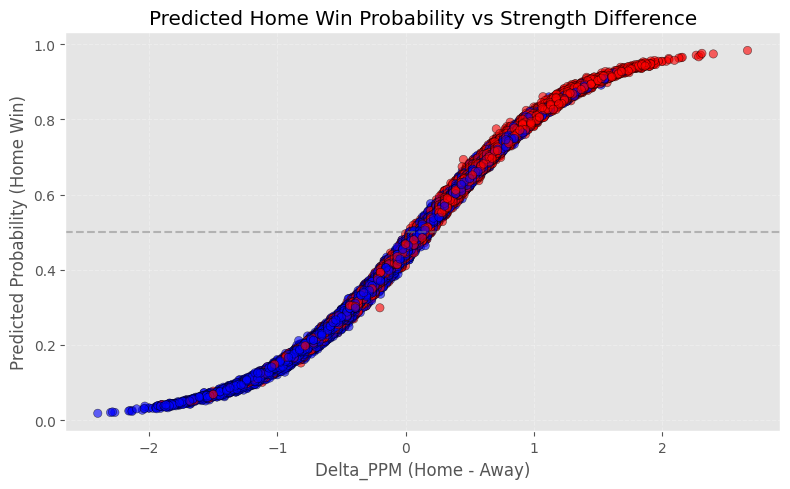

In [ ]:

plt.figure(figsize=(8,5))
scatter = plt.scatter(
    test_matches["Delta_PPM"],
    test_matches["Predicted_Proba"],
    c=test_matches["True_HomeWin"],   # 1 = home win, 0 = not
    cmap="bwr",
    alpha=0.6,
    edgecolor="k",
    linewidth=0.4
)

plt.axhline(0.5, color="gray", linestyle="--", alpha=0.5)

plt.xlabel("Delta_PPM (Home - Away)")
plt.ylabel("Predicted Probability (Home Win)")
plt.title("Predicted Home Win Probability vs Strength Difference")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


### 7.8 Prediction Timeline for a Specific Team

We inspect the model's predictions for a particular team across time. This shows how 
predicted probabilities evolve from match to match and where the model gets 
results right or wrong.


In [1]:
team = "Ath Madrid"  # change to any team

# Only matches where the team is at HOME in the test set
team_home = test_matches[test_matches["HomeTeam"] == team].copy()
team_home = team_home.sort_values("Date")

# 5-match rolling average of predicted probability
team_home["RollingProba"] = team_home["Predicted_Proba"].rolling(window=5).mean()

# Color by actual result: blue = home win, red = not home win
colors = team_home["True_HomeWin"].map({1: "tab:blue", 0: "tab:red"})

plt.figure(figsize=(11,5))

# Smooth trend line
plt.plot(
    team_home["Date"],
    team_home["RollingProba"],
    linewidth=2.5,
    color="orange",
    label="5-match rolling predicted prob"
)

# Individual matches
plt.scatter(
    team_home["Date"],
    team_home["Predicted_Proba"],
    c=colors,
    edgecolor="white",
    s=60,
    alpha=0.9,
    label="Home matches (blue=win, red=not)"
)

# Threshold line at 0.5
plt.axhline(0.5, color="gray", linestyle="--", alpha=0.5)

plt.ylim(0, 1)
plt.title(f"{team} — Predicted Home Win Probabilities (Home Games Only, Test Set)")
plt.xlabel("Date")
plt.ylabel("Predicted Probability (Home Win)")

plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


NameError: name 'test_matches' is not defined